1.0 Import Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import classification_report
from sklearn.metrics import mean_squared_error
from sklearn.decomposition import PCA

2.0 Import Database


In [2]:
df = pd.read_excel(r'C:\Users\dodol\Downloads\IAC_Database\IAC_Database3.xls', sheet_name = 'ASSESS')
df_train = df.copy()

3.0 Exploring the Data Set

In [3]:
#Explore Data Type
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2274 entries, 0 to 2273
Data columns (total 56 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               2274 non-null   object 
 1   CENTER           2274 non-null   object 
 2   FY               2274 non-null   int64  
 3   SIC              2274 non-null   int64  
 4   NAICS            2274 non-null   int64  
 5   STATE            2274 non-null   object 
 6   REGION           2274 non-null   object 
 7   SALES            2274 non-null   int64  
 8   EMPLOYEES        2274 non-null   int64  
 9   PLANT_AREA       2274 non-null   int64  
 10  PRODUCTS         2272 non-null   object 
 11  PRODUNITS        1581 non-null   float64
 12  PRODLEVEL        2253 non-null   float64
 13  PRODHOURS        2274 non-null   int64  
 14  NUMARS           2274 non-null   int64  
 15  EC_plant_cost    2274 non-null   float64
 16  EC_plant_usage   2274 non-null   float64
 17  ED_plant_cost 

In [4]:
#Show lines / Columns
df_train.head()

,ID,CENTER,FY,SIC,NAICS,STATE,REGION,SALES,EMPLOYEES,PLANT_AREA,...,W2_plant_cost,W2_plant_usage,W3_plant_cost,W3_plant_usage,W4_plant_cost,W4_plant_usage,W5_plant_cost,W5_plant_usage,W6_plant_cost,W6_plant_usage
0,AM0649,AM,2014,3412,332439,TX,South,40000000,135,350000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,AM0650,AM,2014,3495,332613,TX,South,13000000,118,80500,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,AM0651,AM,2014,2899,325199,TX,South,150000000,260,265000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,AM0652,AM,2014,3081,326113,TX,South,95000000,200,149415,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,AM0653,AM,2014,3321,331511,UT,West,60000000,150,153500,...,51980.0,11500.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
#Energy consumption  by Products
df_train['PRODUCTS'].value_counts()

Wine                                                          16
Treated Wastewater                                            13
Beer                                                          12
Lumber                                                        10
Wastewater Treatment                                           9
                                                              ..
Terpene Resins                                                 1
Hydraulic pumps and motors                                     1
Orthopedic Prosthetic and Surgical Appliances and Supplies     1
Precision Machined Components                                  1
Animal Feeds                                                   1
Name: PRODUCTS, Length: 1950, dtype: int64

In [6]:
#Shape of dataframe
df_train.shape

(2274, 56)

In [7]:
#Show Null Values
df_train.isna().sum(axis = 0)

ID                    0
CENTER                0
FY                    0
SIC                   0
NAICS                 0
STATE                 0
REGION                0
SALES                 0
EMPLOYEES             0
PLANT_AREA            0
PRODUCTS              2
PRODUNITS           693
PRODLEVEL            21
PRODHOURS             0
NUMARS                0
EC_plant_cost         0
EC_plant_usage        0
ED_plant_cost       236
ED_plant_usage      236
EF_plant_cost       893
E2_plant_cost       409
E2_plant_usage      409
E3_plant_cost      2158
E3_plant_usage     2156
E4_plant_cost      2260
E4_plant_usage     2260
E5_plant_cost      2232
E5_plant_usage     2232
E6_plant_cost      2269
E6_plant_usage     2269
E7_plant_cost      2268
E7_plant_usage     2268
E8_plant_cost      2268
E8_plant_usage     2268
E9_plant_cost      2232
E9_plant_usage     2232
E10_plant_cost     2274
E10_plant_usage    2274
E11_plant_cost     2252
E11_plant_usage    2252
E12_plant_cost     2248
E12_plant_usage 

Analysis of top consumption

In [8]:
#Energy consumption  by Product based on info until 2021
sector_tot_energy = df_train[df_train["FY"] >= 2014].groupby(["PRODUCTS"])["EC_plant_usage"].sum().sort_values(ascending=False).head(10)
sector_tot_energy

#Total Energy consumption  by year
sector_tot_energy_by_year = df_train.groupby(["FY"])["EC_plant_usage"].sum().sort_values(ascending=False)




In [9]:
sector_tot_energy.head

<bound method NDFrame.head of PRODUCTS
Containerboard - Paper    424649000.0
Aluminum                  406980557.0
Rebar and Wire Rod        359713453.0
cement                    324509716.0
Automobiles               292105926.0
Tissue Paper Products     273072843.0
Acrylonitrile             265917000.0
Cigarettes                238308000.0
Polypropylene             224625666.0
Cars                      215054000.0
Name: EC_plant_usage, dtype: float64>

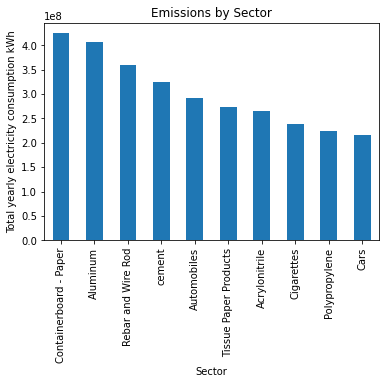

<Figure size 432x288 with 0 Axes>

In [10]:
#Energy consumption  by Sector based on info until 2021
sector_chart = sector_tot_energy.plot(x='sector', y='energy consumption', kind="bar", title="Emissions by Sector")
sector_chart.set_xlabel("Sector")
sector_chart.set_ylabel("Total yearly electricity consumption kWh")

plt.show()
plt.tight_layout()

4.0 Cleaning the dataset

Drop unnecessary columns

In [11]:
df_train.drop(['ID','CENTER','SIC','NAICS','NUMARS','EC_plant_cost','ED_plant_cost','ED_plant_usage','EF_plant_cost','E2_plant_cost','E2_plant_usage','E3_plant_cost','E3_plant_usage','E4_plant_cost','E4_plant_usage','E5_plant_cost','E5_plant_usage','E6_plant_cost','E6_plant_usage','E7_plant_cost','E7_plant_usage','E8_plant_cost','E8_plant_usage','E9_plant_cost','E9_plant_usage','E10_plant_cost','E10_plant_usage','E11_plant_cost','E11_plant_usage','E12_plant_cost','E12_plant_usage','W0_plant_cost','W0_plant_usage','W1_plant_cost','W1_plant_usage','W2_plant_cost','W2_plant_usage','W3_plant_cost','W3_plant_usage','W4_plant_cost','W4_plant_usage','W5_plant_cost','W5_plant_usage','W6_plant_cost',
               'W6_plant_usage', 'PRODUNITS'], axis=1, inplace= True )

In [12]:
#Check for remaining null values
df_train.isna().sum(axis = 0)

FY                 0
STATE              0
REGION             0
SALES              0
EMPLOYEES          0
PLANT_AREA         0
PRODUCTS           2
PRODLEVEL         21
PRODHOURS          0
EC_plant_usage     0
dtype: int64

Drop Null Values (as less than 2%)

In [13]:
df_train.dropna(inplace=True,axis=0)

In [14]:
#Dataframe shape after cleaning
df_train.shape

(2251, 10)

Analyse potential outliers

<AxesSubplot:xlabel='EMPLOYEES'>

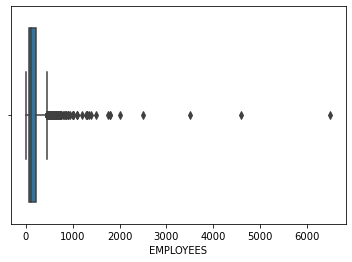

In [15]:
sns.boxplot(x=df_train['EMPLOYEES'])

<AxesSubplot:xlabel='PLANT_AREA'>

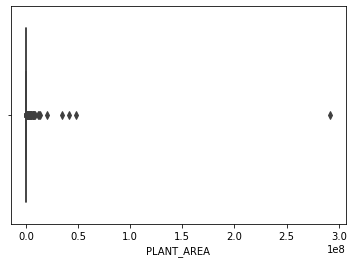

In [16]:
sns.boxplot(x=df_train['PLANT_AREA'])

<AxesSubplot:xlabel='SALES'>

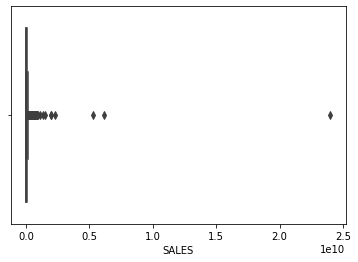

In [17]:
sns.boxplot(x=df_train['SALES'])

Removing outliers

In [18]:
# lets start by removing outliers

# here we define the columns where we have identified there could be outliers
numeric_columns = ['SALES', 'EMPLOYEES', 'PLANT_AREA', 'PRODHOURS','PRODLEVEL']




# this function can be used on any dataset to return a list of index values for the outliers 
def get_outliers(data, columns):
    # we create an empty list
    outlier_idxs = []
    for col in columns:
        elements = data[col]
        # we get the mean value for each column
        mean = elements.mean()
        # and the standard deviation of the column
        sd = elements.std()
        # we then get the index values of all values higher or lower than the mean +/- 2 standard deviations
        outliers_mask = data[(data[col] > mean + 3*sd) | (data[col]  < mean  - 3*sd)].index
        # and add those values to our list
        outlier_idxs  += [x for x in outliers_mask]
    return list(set(outlier_idxs))

# we call the function we just created on the cookies dataset
df_outliers = get_outliers(df_train, numeric_columns)

# and drop those values from our feature and target values
df_train= df_train.drop(df_outliers, axis = 0)


In [19]:
#New shape of dataframe
df_train.shape

(2218, 10)

Deal with Categorical Data (States) - convert to numerical

In [20]:
#Change categorical to numerical variables
df_train['REGION'].value_counts()

Northeast    886
South        813
West         442
Midwest       77
Name: REGION, dtype: int64

In [21]:
region= ["South","Northeast","West", "Midwest"]
df_train[region]= 0
for region in region:
    df_train[region] = np.where(df_train["REGION"].str.contains(region) ,1,0)
df_train.drop("REGION", axis=1, inplace=True)

In [22]:
#New output
df_train

,FY,STATE,SALES,EMPLOYEES,PLANT_AREA,PRODUCTS,PRODLEVEL,PRODHOURS,EC_plant_usage,South,Northeast,West,Midwest
0,2014,TX,40000000,135,350000,Steel and plastic composite drums and containers,3720000.0,8544,7156669.0,1,0,0,0
1,2014,TX,13000000,118,80500,Mechanical springs,151630000.0,4250,2687750.0,1,0,0,0
2,2014,TX,150000000,260,265000,Automotive Chemicals,100000000.0,4884,3582624.0,1,0,0,0
3,2014,TX,95000000,200,149415,Geosynthetic lining products,132000000.0,8760,41074332.0,1,0,0,0
4,2014,UT,60000000,150,153500,Cast Iron Pipe,60000.0,2523,15084000.0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2269,2018,MD,12050000,16,850000,Water,4015000.0,8760,10608544.0,1,0,0,0
2270,2018,OH,30000000,100,250000,Snow removal equipment,168.0,3120,3280758.0,0,1,0,0
2271,2018,OH,20000000,125,111000,Thermoset Plastics,10000.0,7200,6236100.0,0,1,0,0
2272,2018,WV,2000000,22,28000,Electroplating,5200.0,2080,589925.0,1,0,0,0


Check for correlations

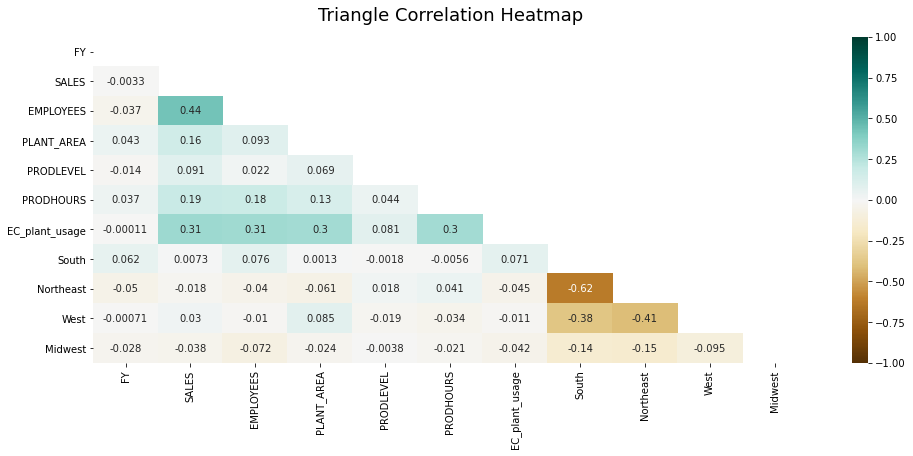

In [23]:
plt.figure(figsize=(16, 6))
# define the mask to set the values in the upper triangle to True
mask = np.triu(np.ones_like(df_train.corr(), dtype=bool))
heatmap = sns.heatmap(df_train.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Triangle Correlation Heatmap', fontdict={'fontsize':18}, pad=16);

Check for variations of independent/dependent variables

In [44]:
df_train.describe()

,SALES,EMPLOYEES,PLANT_AREA,PRODHOURS,EC_plant_usage,South,Northeast,West,Midwest
count,2.218000e+03,2218.000000,2.218000e+03,2218.000000,2.218000e+03,2218.000000,2218.000000,2218.000000,2218.000000
mean,5.886459e+07,158.757439,2.800732e+05,5802.225879,9.662189e+06,0.366546,0.399459,0.199279,0.034716
std,9.710663e+07,145.192556,7.664125e+05,2246.983139,2.181607e+07,0.481970,0.489898,0.399548,0.183101
min,8.000000e+04,2.000000,2.000000e+03,1500.000000,6.919400e+04,0.000000,0.000000,0.000000,0.000000
25%,1.200000e+07,60.000000,6.600000e+04,4133.750000,1.616754e+06,0.000000,0.000000,0.000000,0.000000
50%,3.000000e+07,110.000000,1.220000e+05,6024.000000,3.715482e+06,0.000000,0.000000,0.000000,0.000000
75%,7.000000e+07,206.750000,2.400000e+05,8064.000000,9.731841e+06,1.000000,1.000000,0.000000,0.000000
max,1.500000e+09,907.000000,1.337292e+07,8760.000000,4.246490e+08,1.000000,1.000000,1.000000,1.000000



Drop last irrelevant columns

In [45]:
df_train.drop(['FY','PRODLEVEL','STATE','PRODUCTS'], axis=1, inplace= True )

KeyError: "['FY' 'PRODLEVEL' 'STATE' 'PRODUCTS'] not found in axis"

5.0 Create Models

In [ ]:
#Define dependent / independent variables
X = df_train.drop("EC_plant_usage", axis=1)
y = df_train["EC_plant_usage"]

In [46]:
#Import new libraries
from scipy import stats
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV,cross_validate
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn import metrics
from sklearn.metrics import accuracy_score

In [ ]:
#Linear regression
model = sm.OLS(y, X)
results = model.fit()
print(results.summary())



Test variable significance (Hypothesis testing)

In [47]:
import scipy.stats as stats
zs = stats.ttest_1samp(df_train['SALES'], 0)
print(zs)
zc = stats.norm.ppf(1-(0.05/2))
print("Our zc score is: {:.2f}".format(zc))


Ttest_1sampResult(statistic=28.548680110381884, pvalue=6.221647267787291e-153)
Our zc score is: 1.96


In [48]:
import scipy.stats as stats
zs = stats.ttest_1samp(df_train['EMPLOYEES'], 0)
print(zs)
zc = stats.norm.ppf(1-(0.05/2))
print("Our zc score is: {:.2f}".format(zc))

Ttest_1sampResult(statistic=51.49564518365711, pvalue=0.0)
Our zc score is: 1.96


In [49]:
import scipy.stats as stats
zs = stats.ttest_1samp(df_train['PLANT_AREA'], 0)
print(zs)
zc = stats.norm.ppf(1-(0.05/2))
print("Our zc score is: {:.2f}".format(zc))

Ttest_1sampResult(statistic=17.210349584928597, pvalue=2.09992832919358e-62)
Our zc score is: 1.96


In [50]:
import scipy.stats as stats
zs = stats.ttest_1samp(df_train['PRODHOURS'], 0)
print(zs)
zc = stats.norm.ppf(1-(0.05/2))
print("Our zc score is: {:.2f}".format(zc))

Ttest_1sampResult(statistic=121.61176429372364, pvalue=0.0)
Our zc score is: 1.96


Train Model

In [51]:

#we have a lot of observations, we will train the model with the 87.5% of the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.125)

In [52]:
# test/train set
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape) 

(1940, 8) (1940,)
(278, 8) (278,)


In [53]:
# Define Linear Model
lm = LinearRegression()


In [54]:
scores = cross_val_score(lm, X_train, y_train, cv = 15)

In [55]:
print(scores, np.mean(scores), np.std(scores))

[ 0.20517227  0.55919737 -0.28471493  0.46268785  0.24430316  0.16860986
  0.2168006   0.31805653 -0.92348514  0.2029921   0.05009987  0.41269823
  0.29293631  0.33944492  0.11704644] 0.15878969647988542 0.3454077871469464


Text(0.5, 1.0, 'Error Distribution of Linear Regression')

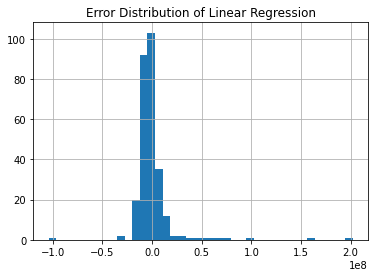

In [56]:
# Plot Error Distribution of Linear Regression
y_pred = cross_val_predict(lm, X_test, y_test, cv = 15)     #y_test is needed here in predictions to get scores for each fold of cv

diff = y_test - y_pred
diff.hist(bins = 40)
plt.title('Error Distribution of Linear Regression')



In [57]:
#Check accuracy
#accuracy = accuracy_score(y_test, y_pred)

In [58]:
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

RMSE: 21433473.4695803


In [59]:
#Polynomial regression
poly_reg = PolynomialFeatures(degree=2)
X_poly = poly_reg.fit_transform(X)
pol_reg = LinearRegression()
polyr=pol_reg.fit(X_poly, y)

In [60]:
#Calculate scores
scores2 = cross_val_score(polyr, X_train, y_train, cv = 16)

In [61]:
#Check scores for cvs
print(scores2, np.mean(scores), np.std(scores))

[ 0.20925494  0.53658825  0.01393651  0.19877559  0.3456533   0.38740184
  0.19031341  0.30523744 -0.68991539 -0.14025311  0.20553667 -0.25166263
  0.61884842  0.22012762  0.24125045  0.1156775 ] 0.15878969647988542 0.3454077871469464


Text(0.5, 1.0, 'Error Distribution of Polynomial Regression')

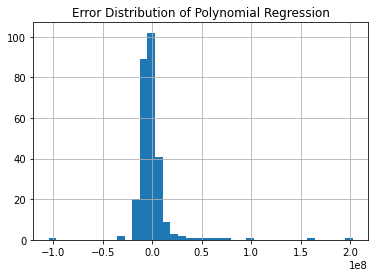

In [62]:
y_pred2 = cross_val_predict(polyr, X_test, y_test, cv = 16)     #y_test is needed here in predictions to get scores for each fold of cv

diff = y_test - y_pred2
diff.hist(bins = 40)
plt.title('Error Distribution of Polynomial Regression')


In [ ]:
#The distribution of the errors follows quite closely a gaussian distribution. That suggests that our models are doing a good job in making predictions.

In [63]:
#Check accuracy
#accuracy = accuracy_score(y_test, y_pred2)

In [64]:
#Use RMSE for model evaluation
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred2)))

RMSE: 21483701.80568208


In [65]:
#Random Forest Regressor

In [66]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import RFE

In [67]:
#Random Forest Regressor (Define Function: model performance)
def model_performance_metric(y_train, y_pred_train, y_test, y_pred_test):
    """ Calculates and returns the performance score between 
        true and predicted values based on the metric chosen. """

    R2_train = r2_score(y_train,y_pred_train)
    R2_test  = r2_score(y_test,y_pred_test)

    MSE_train = mean_squared_error(y_train,y_pred_train)
    MSE_test  = mean_squared_error(y_test,y_pred_test)

    RMSE_train = np.sqrt(MSE_train)
    RMSE_test  = np.sqrt(MSE_test)

    performance = pd.DataFrame({'Error_metric': ['RMSE','R2'], 'Train': [RMSE_train, R2_train], 'Test' : [RMSE_test, R2_test]})



    pd.options.display.float_format = '{:.2f}'.format


    df_train = pd.DataFrame({'Real_value': y_train, 'Predicted_value': y_pred_train})
    df_test  = pd.DataFrame({'Real_value': y_test,  'PRedicted_value': y_pred_test})

    return performance, df_train, df_test

In [68]:
max_depth_list = [1,2,6,8,10,12,15, 17]
full = pd.DataFrame()

rfr_models = {'i': []}

for i in max_depth_list:
    rfr = RandomForestRegressor(max_depth = i)
    rfr.fit(X_train, y_train)

    rfr_models['i'] = [i, rfr]
    
    y_pred_train = rfr.predict(X_train)
    y_pred_test= rfr.predict(X_test)

    performance_rfr, _, _ = model_performance_metric(y_train, y_pred_train, y_test, y_pred_test)
    temp = pd.DataFrame({'i': [i]*2, 'Error metric': performance_rfr['Error_metric'], 'Train': performance_rfr['Train'],
                        'Test': performance_rfr['Test']})
    full = pd.concat([full,temp], axis=0)

full

,i,Error metric,Train,Test
0,1,RMSE,19497923.48,21938224.36
1,1,R2,0.19,0.04
0,2,RMSE,16979780.36,22049800.17
1,2,R2,0.39,0.03
0,6,RMSE,10816781.03,22020960.62
1,6,R2,0.75,0.03
0,8,RMSE,8901952.15,22900786.84
1,8,R2,0.83,-0.05
0,10,RMSE,8179220.40,22267811.26
1,10,R2,0.86,0.01


In [69]:
#15 depth for randon forest looks guide good

In [70]:
#Checking for relevant features in Random Forest (RFE Test)

In [71]:
model = RandomForestRegressor()
#Initializing RFE model
rfe = RFE(model, 15)
#Transforming data using RFE
rfe.fit(X_train,y_train)  
#Fitting the data to model
#model.fit(X_rfe,y_train)
print(rfe.support_)
print(rfe.ranking_)

C:\Users\dodol\Anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_features_to_select=15 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


[ True  True  True  True  True  True  True  True]
[1 1 1 1 1 1 1 1]


In [72]:
cols = list(X.columns)
model = RandomForestRegressor()
#Initializing RFE model
rfe = RFE(model, 15)             
#Transforming data using RFE
X_rfe = rfe.fit_transform(X_train,y_train)  
#Fitting the data to model
model.fit(X_rfe,y_train)              
temp = pd.Series(rfe.support_,index = cols)
selected_features_rfe = temp[temp==True].index
print(selected_features_rfe)

C:\Users\dodol\Anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_features_to_select=15 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


Index(['SALES', 'EMPLOYEES', 'PLANT_AREA', 'PRODHOURS', 'South', 'Northeast',
       'West', 'Midwest'],
      dtype='object')


In [73]:
#All selected features are relevant (even regions). 

Stacking the models (with Random Forest)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.125)

#Let’s go ahead and select a subset of the most predictive features.
from sklearn.feature_selection import SelectFromModel

# Create a random forest classifier
clf = RandomForestClassifier(n_estimators=10000, random_state=0, n_jobs=-1)

# Train the classifier
clf.fit(X_train, y_train)

# Print the name and gini importance of each feature
for feature in zip(feat_labels, clf.feature_importances_):
    print(feature)


In [ ]:
# Create a selector object that will use the random forest classifier to identify
# features that have an importance of more than 0.15
sfm = SelectFromModel(clf, threshold=0.15)

# Train the selector
sfm.fit(X_train, y_train)

In [ ]:
# Transform the data to create a new dataset containing only the most important features
# Note: We have to apply the transform to both the training X and test X data.
X_important_train = sfm.transform(X_train)
X_important_test = sfm.transform(X_test)





In [ ]:
# Create a new random forest classifier for the most important features
clf_important = RandomForestClassifier(n_estimators=10000, random_state=0, n_jobs=-1)

# Train the new classifier on the new dataset containing the most important features
clf_important.fit(X_important_train, y_train)

In [ ]:
# Train the Polynomial regression on the new dataset containing the most important features
X_poly = poly_reg.fit_transform(X_important_train)
pol_reg = LinearRegression()
polyr=pol_reg.fit(X_poly, y_train)

In [ ]:
y_pred3 = cross_val_predict(polyr, X_Important_test, y_test, cv = 16) 

In [ ]:
#Use RMSE for model evaluation
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred3)))

In [ ]:
# Train the Linear regression on the new dataset containing the most important features
X_poly = poly_reg.fit_transform()
linear_reg = LinearRegression()
linear=linear_reg.fit(X_important_train, y_train)

In [ ]:
y_pred4 = cross_val_predict(linear, X_Important_test, y_test, cv = 16) 

In [ ]:
#Use RMSE for model evaluation
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred4)))